In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
file = "Resources/WT v FREQ - 13.csv"

In [21]:
df = pd.read_csv(file)
df.head()

,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Total %,Total % SE,Total % CI (lower),Total % CI (upper),Row %,Row % SE,Row % CI (lower),Row % CI (upper),Column %,Column % SE,Column % CI (lower),Column % CI (upper),Weighted Count,Unweighted Count,Count SE
0,1 - Prefer to answer in days per week,100,0.001091,0.000496,0.000439,0.002705,0.371991,0.125073,0.168736,0.633496,0.002986,0.001358,0.001201,0.007405,35042.61,13,15960.956440
1,1 - Prefer to answer in days per week,101,0.000030,0.000031,0.000004,0.000228,0.213024,0.192199,0.026595,0.728393,0.000084,0.000084,0.000011,0.000631,980.88,1,980.880000
2,1 - Prefer to answer in days per week,102,0.000278,0.000170,0.000082,0.000946,0.333215,0.163338,0.103012,0.684998,0.000761,0.000466,0.000223,0.002591,8928.89,5,5428.629920
3,1 - Prefer to answer in days per week,103,0.000239,0.000131,0.000080,0.000715,0.183640,0.098258,0.057167,0.454912,0.000654,0.000363,0.000215,0.001982,7672.62,5,4189.291895
4,1 - Prefer to answer in days per week,104,0.000190,0.000089,0.000075,0.000484,0.279339,0.130666,0.095686,0.586767,0.000521,0.000243,0.000205,0.001325,6116.89,5,2842.082140


In [22]:
new_df = df[['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH',
             'WEIGHT IN POUNDS - RECODE',
            'Unweighted Count']]
new_df.reset_index

new_df.head()

,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Unweighted Count
0,1 - Prefer to answer in days per week,100,13
1,1 - Prefer to answer in days per week,101,1
2,1 - Prefer to answer in days per week,102,5
3,1 - Prefer to answer in days per week,103,5
4,1 - Prefer to answer in days per week,104,5


In [23]:
new_df[['WEIGHT IN POUNDS - RECODE', 'Unweighted Count']] = new_df[['WEIGHT IN POUNDS - RECODE', 'Unweighted Count']].astype(float)
new_df['Total Weight'] = np.multiply(new_df['WEIGHT IN POUNDS - RECODE'], new_df['Unweighted Count'])
new_df.head()

C:\Users\garyf\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\garyf\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,WEIGHT IN POUNDS - RECODE,Unweighted Count,Total Weight
0,1 - Prefer to answer in days per week,100.0,13.0,1300.0
1,1 - Prefer to answer in days per week,101.0,1.0,101.0
2,1 - Prefer to answer in days per week,102.0,5.0,510.0
3,1 - Prefer to answer in days per week,103.0,5.0,515.0
4,1 - Prefer to answer in days per week,104.0,5.0,520.0


In [24]:
total_weight = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])['Total Weight'].sum()
total_count = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])['Unweighted Count'].sum()
avg_weight = total_weight/total_count
status = new_df.groupby(['EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH'])
avg_weight

EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH
1 - Prefer to answer in days per week     167.402690
2 - Prefer to answer in days per month    166.486183
3 - Prefer to answer in days per year     166.041869
dtype: float64

In [25]:
final_df = pd.DataFrame({"Average Weight": avg_weight}).round(1)
final_df

,Average Weight
EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH,
1 - Prefer to answer in days per week,167.4
2 - Prefer to answer in days per month,166.5
3 - Prefer to answer in days per year,166.0


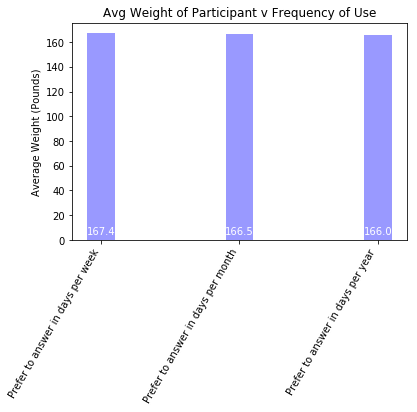

In [27]:
fig, ax = plt.subplots()
index = np.arange(len(avg_weight)) 
bar_width = 0.2
opacity = 0.4
error_config = {'ecolor': '0.3'}



rects1 = ax.bar(index, avg_weight, bar_width,
               alpha=opacity, color='b',
               error_kw=error_config,
               )



ax.set_ylabel("Average Weight (Pounds)")
ax.set_title("Avg Weight of Participant v Frequency of Use")
ax.set_xticks(index)
ax.set_xticklabels(('Prefer to answer in days per week', 'Prefer to answer in days per month','Prefer to answer in days per year'), rotation=60,ha='right')

def autolabelPass(rects1):
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%.1f' % float(height),
                ha='center', va='bottom', color="white")

autolabelPass(rects1)

plt.show()